# CMAPSSA Dataset Exploration

## CMAPSS Dataset Variants 


<br>The most commonly used datasets are:<br>
<br>-FD001: Single operating condition, single fault mode.
<br>-FD002: Multiple operating conditions, single fault mode.
<br>-FD003: Single operating condition, multiple fault modes.
<br>-FD004: Multiple operating conditions, multiple fault modes.

In [3]:
import pandas as pd
train_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/train_FD001.txt",sep = ' ', header=None)
train_FD001.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:
train_FD001.tail()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,NaN,NaN


In [9]:
test_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/test_FD001.txt",sep = ' ', header=None)
test_FD001.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [15]:
def clean_train_data(df: pd.DataFrame):

    """
    This function assigns column names to the DataFrame, drops specified columns,
    and adds a Remaining Useful Life (RUL) column.

    Parameters:
    df (pd.DataFrame): Input DataFrame to be cleaned.

    Returns:
    pd.DataFrame: Cleaned DataFrame with RUL column added.
    """
    # Rename the columns
    columns =['id',
            'cycle',
            'setting1',
            'setting2',
            'setting3',
            'T2_Total_temperature_at_fan_inlet',
            'T24_Total_temperature_at_LPC_outlet',
            'T30_Total_temperature_at_HPC_outlet',
            'T50_Total_temperature_at_LPT_outlet',
            'P2_Pressure_at_fan_inlet',
            'P15_Total_pressure_in_bypass_duct',
            'P30_Total_pressure_at_HPC_outlet',
            'Nf_Physical_fan_speed',
            'Nc_Physical_core_speed',
            'epr_Engine_pressure_ratio',
            'Ps30_Static_pressure_at_HPC_outlet',
            'phi_Ratio_of_fuel_flow_to_Ps30',
            'NRf_Corrected_fan_speed',
            'NRc_Corrected_core_speed',
            'BPR_Bypass_Ratio',
            'farB_Burner_fuel_air_ratio',
            'htBleed_Bleed_Enthalpy',
            'Nf_dmd_Demanded_fan_speed',
            'PCNfR_dmd_Demanded_corrected_fan_speed',
            'W31_HPT_coolant_bleed',
            'W32_LPT_coolant_bleed',
            'sm22',
            'sm23']

    # Assign the column names to the DataFrame
    df.columns = columns

    # Add Remaining Useful Life (RUL) column
    max_cycle = df.groupby('id')['cycle'].max()
    df = df.merge(max_cycle, on='id', suffixes=('', '_max'))
    df['RUL'] = df['cycle_max'] - df['cycle']
    df = df.drop(columns=['cycle_max'])

    # Columns to drop
    columns_to_drop = ['sm22', 'sm23', 'setting3', 'T2_Total_temperature_at_fan_inlet', 'P2_Pressure_at_fan_inlet', "P15_Total_pressure_in_bypass_duct",
            'epr_Engine_pressure_ratio', 'farB_Burner_fuel_air_ratio', 'Nf_dmd_Demanded_fan_speed',
            'PCNfR_dmd_Demanded_corrected_fan_speed']

    # Drop the specified columns
    cleaned_train_df= df.drop(columns_to_drop, axis=1)

    return cleaned_train_df

In [16]:
train = clean_train_data(train_FD001)
train.head()

,id,cycle,setting1,setting2,T24_Total_temperature_at_LPC_outlet,T30_Total_temperature_at_HPC_outlet,T50_Total_temperature_at_LPT_outlet,P30_Total_pressure_at_HPC_outlet,Nf_Physical_fan_speed,Nc_Physical_core_speed,Ps30_Static_pressure_at_HPC_outlet,phi_Ratio_of_fuel_flow_to_Ps30,NRf_Corrected_fan_speed,NRc_Corrected_core_speed,BPR_Bypass_Ratio,htBleed_Bleed_Enthalpy,W31_HPT_coolant_bleed,W32_LPT_coolant_bleed,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


## Train data

In [125]:
train.head()

,unit_number,time_in_cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [126]:
train.tail()

,unit_number,time_in_cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [127]:
train.shape

(20631, 26)

### No. of Units in each engine

In [128]:
train['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [145]:
train[train['unit_number']== 1]

,unit_number,time_in_cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


*** It shows that the engine failed at cycle 192**
<br> That mean RUL of unit 1 of engine 1 is 192 at begining

## Test data

- Contains partial life cycles of engines.<br>
- The true RUL values for the last recorded cycle of each engine are provided separately for evaluation.<br>
- Used to test and evaluate the performance of the predictive maintenance models.

In [130]:
test.shape

(13096, 26)

In [131]:
test.head()

,unit_number,time_in_cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [132]:
test.tail()

,unit_number,time_in_cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699
13095,100,198,0.0013,0.0003,100.0,518.67,642.95,1601.62,1424.99,14.62,...,521.07,2388.05,8214.64,8.4903,0.03,396,2388,100.0,38.70,23.1855


### No. of Units in each engine

In [133]:
test['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

## Target data -- RUL

**This is the true Remaining Useful Life (RUL) values for the test data.**

In [134]:
rul.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [135]:
rul.shape

(100, 1)

In [136]:
test[test['unit_number']== 1].head()

,unit_number,time_in_cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [137]:
test[test['unit_number']== 1].shape

(31, 26)

In [138]:
rul.iloc[0]

RUL    112
Name: 0, dtype: int64

In [139]:
train['unit_number'].value_counts()

69    362
92    341
96    336
67    313
83    293
     ... 
24    147
57    137
70    137
91    135
39    128
Name: unit_number, Length: 100, dtype: int64

In [143]:
train['RUL'] = train.groupby('unit_number')['time_in_cycles'].transform(max) - train['time_in_cycles']
train['RUL'].head()

0    191
1    190
2    189
3    188
4    187
Name: RUL, dtype: int64

In [149]:
train[:2]['RUL']

0    191
1    190
Name: RUL, dtype: int64

Text(0, 0.5, 'sensor measurement2')

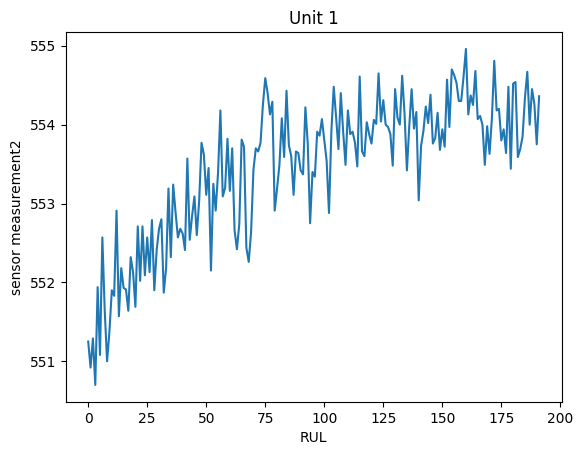

In [158]:
import matplotlib.pyplot as plt

plt.plot(train[:192]['RUL'],train[:192]['sm7'])
plt.title('Unit 1')
plt.xlabel('RUL')
plt.ylabel('sensor measurement2')

Text(0, 0.5, 'sensor measurement2')

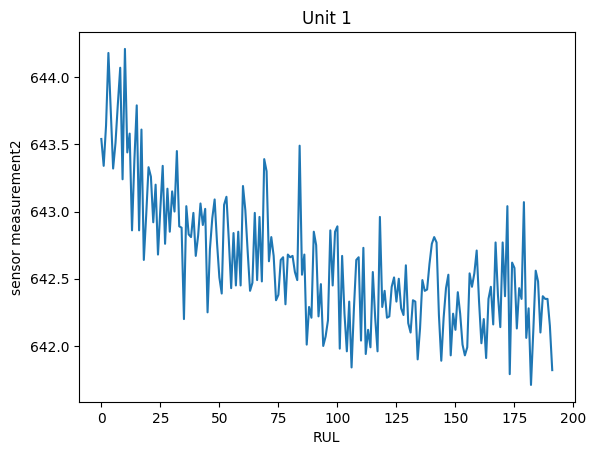

In [159]:
plt.plot(train[:192]['RUL'],train[:192]['sm2'])
plt.title('Unit 1')
plt.xlabel('RUL')
plt.ylabel('sensor measurement2')

Text(0, 0.5, 'sensor measurement2')

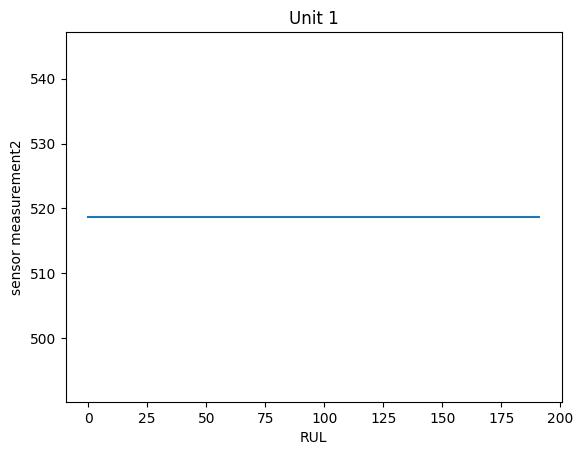

In [160]:
plt.plot(train[:192]['RUL'],train[:192]['sm1'])
plt.title('Unit 1')
plt.xlabel('RUL')
plt.ylabel('sensor measurement2')

In [17]:
train.head()

,id,cycle,setting1,setting2,T24_Total_temperature_at_LPC_outlet,T30_Total_temperature_at_HPC_outlet,T50_Total_temperature_at_LPT_outlet,P30_Total_pressure_at_HPC_outlet,Nf_Physical_fan_speed,Nc_Physical_core_speed,Ps30_Static_pressure_at_HPC_outlet,phi_Ratio_of_fuel_flow_to_Ps30,NRf_Corrected_fan_speed,NRc_Corrected_core_speed,BPR_Bypass_Ratio,htBleed_Bleed_Enthalpy,W31_HPT_coolant_bleed,W32_LPT_coolant_bleed,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [19]:
engine_1_data = train[train['id'] == 1]
engine_1_data

,id,cycle,setting1,setting2,T24_Total_temperature_at_LPC_outlet,T30_Total_temperature_at_HPC_outlet,T50_Total_temperature_at_LPT_outlet,P30_Total_pressure_at_HPC_outlet,Nf_Physical_fan_speed,Nc_Physical_core_speed,Ps30_Static_pressure_at_HPC_outlet,phi_Ratio_of_fuel_flow_to_Ps30,NRf_Corrected_fan_speed,NRc_Corrected_core_speed,BPR_Bypass_Ratio,htBleed_Bleed_Enthalpy,W31_HPT_coolant_bleed,W32_LPT_coolant_bleed,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,643.75,1602.38,1422.78,551.94,2388.31,9037.91,48.00,519.79,2388.23,8117.69,8.5207,396,38.51,22.9588,4
188,1,189,-0.0006,0.0002,644.18,1596.17,1428.01,550.70,2388.27,9044.55,48.08,519.58,2388.33,8117.51,8.5183,395,38.48,23.1127,3
189,1,190,-0.0027,0.0001,643.64,1599.22,1425.95,551.29,2388.29,9040.58,48.33,520.04,2388.35,8112.58,8.5223,398,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,643.34,1602.36,1425.77,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295,1


In [27]:
from sklearn.preprocessing import StandardScaler
engine_1_data = train[train['id'] == 1]
sensor_df_1 = engine_1_data.drop(columns = ['id','cycle', 'setting1', 'setting2', 'RUL'])
scaler = StandardScaler()
scaled_sensor_df_1 = scaler.fit_transform(sensor_df_1)
sensor_plot_1 = pd.DataFrame(scaled_sensor_df_1, columns=sensor_df_1.columns)

In [30]:
engine_2_data = train[train['id'] == 2]
sensor_df_2 = engine_2_data.drop(columns = ['id','cycle', 'setting1', 'setting2', 'RUL'])
#scaler = StandardScaler()
scaled_sensor_df_2 = scaler.transform(sensor_df_2)
sensor_plot_2 = pd.DataFrame(scaled_sensor_df_2, columns=sensor_df_2.columns)

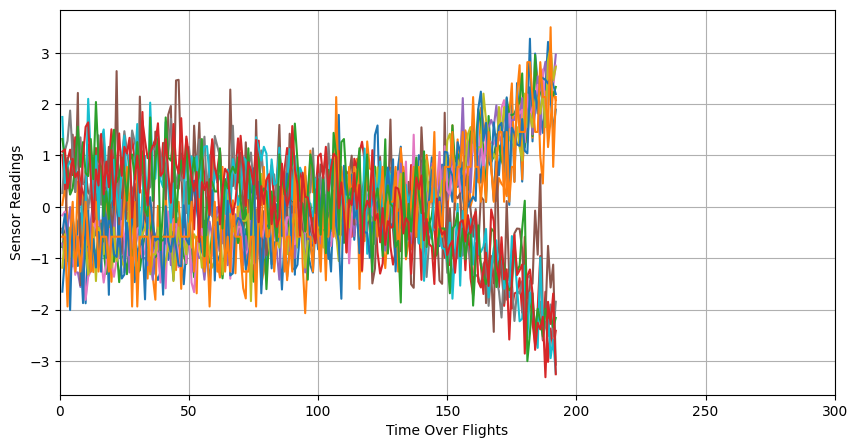

In [40]:
import matplotlib.pyplot as plt

sensor_columns = sensor_df_1.columns
plt.figure(figsize = (10,5))
for sensor in sensor_columns:
    plt.plot(engine_1_data['cycle'], sensor_plot_1[sensor])
    
plt.xlabel('Time Over Flights')
plt.ylabel('Sensor Readings')
plt.xlim(0,300)
plt.grid(True)
#plt.title('Sensor Readings for Engine 1')
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

#plt.plot(engine_1_data['cycle'], )

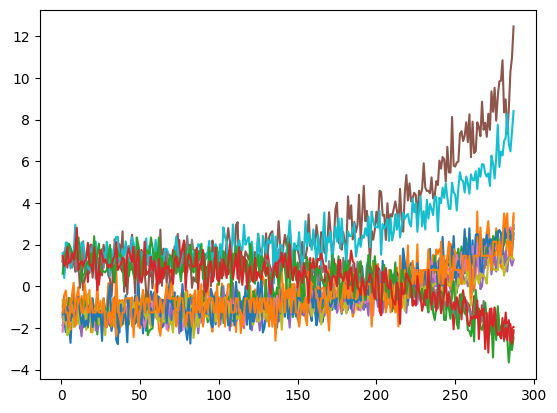

In [34]:
for sensor in sensor_columns:
    plt.plot(engine_2_data['cycle'], sensor_plot_2[sensor])